# PROJECT 1: CLEANING DATA


## ----------------------------------------------------------------------------------------------

## Angela Spirou's Cleaning

## ----------------------------------------------------------------------------------------------

In [31]:
# Import Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, ttest_ind

In [32]:
# Create a reference the CSV file desired
csv_path = "csv_references/health_ineq_online_table_2.csv"

# Read the CSV into a Pandas DataFrame
nat_gen_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
nat_gen_df.head()

,gnd,pctile,year,count,hh_inc,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,F,1,2001,398740,499.10938,79.682068,79.893463,0.392838,0.385240
1,F,1,2002,411159,541.30695,79.183594,79.410622,0.353981,0.346817
2,F,1,2003,420298,529.13910,79.364410,79.572174,0.364780,0.359097
3,F,1,2004,427728,499.29950,79.898407,80.092476,0.352018,0.347992
4,F,1,2005,433665,474.14536,80.283600,80.465935,0.334612,0.330986


In [33]:
# Drop unwanted information
clean_nat_gen_df = nat_gen_df[["gnd", "pctile", "year","le_raceadj"]]
clean_nat_gen_df.head()

,gnd,pctile,year,le_raceadj
0,F,1,2001,79.893463
1,F,1,2002,79.410622
2,F,1,2003,79.572174
3,F,1,2004,80.092476
4,F,1,2005,80.465935


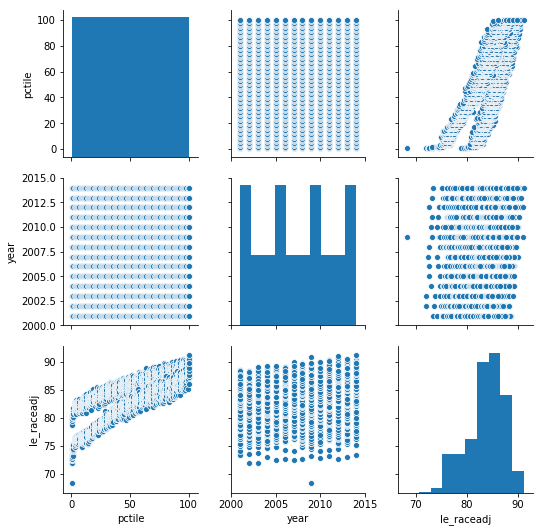

In [34]:
# Check data for trends
sns.pairplot(clean_nat_gen_df)

In [35]:
# Check types
clean_nat_gen_df.dtypes

gnd            object
pctile          int64
year            int64
le_raceadj    float64
dtype: object

In [36]:
# Rename columns for readability
clean_nat_gen_renamed = clean_nat_gen_df.rename(columns={"gnd": "Gender","pctile": "Percentile", "year": "Year","le_raceadj": "Life Expectancy Adjusted"})
clean_nat_gen_renamed.head()

,Gender,Percentile,Year,Life Expectancy Adjusted
0,F,1,2001,79.893463
1,F,1,2002,79.410622
2,F,1,2003,79.572174
3,F,1,2004,80.092476
4,F,1,2005,80.465935


In [37]:
# Check to see if there is any missing data
clean_nat_gen_renamed
clean_nat_gen_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 4 columns):
Gender                      2800 non-null object
Percentile                  2800 non-null int64
Year                        2800 non-null int64
Life Expectancy Adjusted    2800 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 87.6+ KB


In [38]:
clean_nat_gen_renamed.to_csv("csv_references/clean_nat_gen_renamed.csv", index = False, header = True)

## ----------------------------------------------------------------------------------------------

## Lauren Gama's Cleaning

## ----------------------------------------------------------------------------------------------

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Name of the CSV file
table2 = 'csv_references/health_ineq_online_table_2.csv'

# create df
table2_df = pd.read_csv(table2)

# Preview of the DataFrame
table2_df.head()

,gnd,pctile,year,count,hh_inc,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,F,1,2001,398740,499.10938,79.682068,79.893463,0.392838,0.385240
1,F,1,2002,411159,541.30695,79.183594,79.410622,0.353981,0.346817
2,F,1,2003,420298,529.13910,79.364410,79.572174,0.364780,0.359097
3,F,1,2004,427728,499.29950,79.898407,80.092476,0.352018,0.347992
4,F,1,2005,433665,474.14536,80.283600,80.465935,0.334612,0.330986


In [40]:
table2_df.dtypes

gnd               object
pctile             int64
year               int64
count              int64
hh_inc           float64
le_agg           float64
le_raceadj       float64
sd_le_agg        float64
sd_le_raceadj    float64
dtype: object

In [41]:
table2_df.columns

Index(['gnd', 'pctile', 'year', 'count', 'hh_inc', 'le_agg', 'le_raceadj',
       'sd_le_agg', 'sd_le_raceadj'],
      dtype='object')

In [42]:
nat_gen_inc = table2_df[["gnd", "pctile", "year", "le_raceadj"]]
nat_gen_inc.head()

,gnd,pctile,year,le_raceadj
0,F,1,2001,79.893463
1,F,1,2002,79.410622
2,F,1,2003,79.572174
3,F,1,2004,80.092476
4,F,1,2005,80.465935


In [43]:
# queartile bins

# Create the bins in which Data will be held
bins = [0, 25, 50, 75, 100]

# Create the names for the bins
group_names = ["Q1", "Q2", "Q3", "Q4"]

#Categorize using the percentile bins
nat_gen_inc["quartiles"] = pd.cut(nat_gen_inc["pctile"], bins, labels=group_names)
nat_gen_inc.head()

C:\Users\angsp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,gnd,pctile,year,le_raceadj,quartiles
0,F,1,2001,79.893463,Q1
1,F,1,2002,79.410622,Q1
2,F,1,2003,79.572174,Q1
3,F,1,2004,80.092476,Q1
4,F,1,2005,80.465935,Q1


In [44]:
nat_gen_inc.to_csv("csv_references/nat_gen_inc.csv", index=False, header= True)

## ----------------------------------------------------------------------------------------------

## Kevin Menz's Cleaning

## ----------------------------------------------------------------------------------------------

In [45]:
#import dependencies
import pandas as pd
import numpy as np

csv = 'csv_references/health_ineq_online_table_3.csv'

#pull csv file
stateinfo_csv = pd.read_csv(csv)

#Organize into DF
stateinfo_df = pd.DataFrame(stateinfo_csv)
stateinfo_df.head()

,st,stateabbrv,statename,le_agg_q1_F,le_raceadj_q1_F,le_agg_q2_F,le_raceadj_q2_F,le_agg_q3_F,le_raceadj_q3_F,le_agg_q4_F,...,sd_le_agg_q4_M,sd_le_raceadj_q4_M,count_q1_F,count_q2_F,count_q3_F,count_q4_F,count_q1_M,count_q2_M,count_q3_M,count_q4_M
0,1,AL,Alabama,81.208611,82.228058,83.856339,84.474808,85.357079,85.808136,86.899963,...,0.133115,0.137470,3419114,2803243,2520347,2119247,2862389,2728540,2481761,2005954
1,2,AK,Alaska,82.583572,82.348953,83.815147,83.712013,85.854538,85.585838,87.157089,...,0.259998,0.255466,287869,364928,439382,528988,339042,374547,484283,537646
2,4,AZ,Arizona,82.646103,82.151314,84.398926,84.147186,85.876945,85.781685,87.412048,...,0.111824,0.112572,3281760,3395651,3120125,3014634,3288830,3113884,2943030,2875894
3,5,AR,Arkansas,80.595299,81.310768,83.675117,84.123650,85.256210,85.637344,87.324226,...,0.188881,0.191635,2070245,1804408,1490854,1025154,1882283,1762111,1408915,949898
4,6,CA,California,84.436256,82.946465,84.858124,83.530724,86.082794,84.965134,87.839706,...,0.042867,0.130121,20215088,18383557,18250582,23014857,20578421,17762051,17285647,22682795


In [46]:
#Shorten To Necessary Columns
stateinfo_clean = stateinfo_df[['stateabbrv', 'statename' ,'le_raceadj_q1_F','le_raceadj_q2_F','le_raceadj_q3_F','le_raceadj_q4_F', 
                                'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M','le_raceadj_q4_M']]

stateinfo_clean.head()

,stateabbrv,statename,le_raceadj_q1_F,le_raceadj_q2_F,le_raceadj_q3_F,le_raceadj_q4_F,le_raceadj_q1_M,le_raceadj_q2_M,le_raceadj_q3_M,le_raceadj_q4_M
0,AL,Alabama,82.228058,84.474808,85.808136,87.224434,75.376083,79.430519,82.262962,84.497810
1,AK,Alaska,82.348953,83.712013,85.585838,87.168770,76.639389,80.524376,82.445099,85.575829
2,AZ,Arizona,82.151314,84.147186,85.781685,87.435135,77.007629,80.474632,82.700462,85.230026
3,AR,Arkansas,81.310768,84.123650,85.637344,87.601463,75.763702,79.606911,82.115067,84.158447
4,CA,California,82.946465,83.530724,84.965134,86.939842,78.731621,80.364868,82.369225,85.161736


In [47]:
#Rename current columns
stateinfo_clean = stateinfo_clean.rename(columns = {'stateabbrv': 'Abbrv', 'statename': 'State','le_raceadj_q1_F': 'LE Q1 F'
                                                    ,'le_raceadj_q2_F': 'LE Q2 F','le_raceadj_q3_F': 'LE Q3 F',
                                                    'le_raceadj_q4_F': 'LE Q4 F', 'le_raceadj_q1_M': 'LE Q1 M', 
                                                    'le_raceadj_q2_M': 'LE Q2 M', 'le_raceadj_q3_M': 'LE Q3 M',
                                                    'le_raceadj_q4_M': 'LE Q4 M' })
stateinfo_clean.head()

,Abbrv,State,LE Q1 F,LE Q2 F,LE Q3 F,LE Q4 F,LE Q1 M,LE Q2 M,LE Q3 M,LE Q4 M
0,AL,Alabama,82.228058,84.474808,85.808136,87.224434,75.376083,79.430519,82.262962,84.497810
1,AK,Alaska,82.348953,83.712013,85.585838,87.168770,76.639389,80.524376,82.445099,85.575829
2,AZ,Arizona,82.151314,84.147186,85.781685,87.435135,77.007629,80.474632,82.700462,85.230026
3,AR,Arkansas,81.310768,84.123650,85.637344,87.601463,75.763702,79.606911,82.115067,84.158447
4,CA,California,82.946465,83.530724,84.965134,86.939842,78.731621,80.364868,82.369225,85.161736


In [48]:
#Add In Average Columns
stateinfo_clean['Female Average'] = (stateinfo_clean['LE Q1 F'] + stateinfo_clean['LE Q2 F']
                                                     + stateinfo_clean['LE Q3 F'] + stateinfo_clean['LE Q4 F']) / 4

stateinfo_clean['Male Average'] = (stateinfo_clean['LE Q1 M'] + stateinfo_clean['LE Q2 M']
                                                     + stateinfo_clean['LE Q3 M'] + stateinfo_clean['LE Q4 M']) / 4

stateinfo_clean['Q1 Average'] = (stateinfo_clean['LE Q1 F'] + stateinfo_clean['LE Q1 M']) / 2

stateinfo_clean['Q2 Average'] = (stateinfo_clean['LE Q2 F'] + stateinfo_clean['LE Q2 M']) / 2

stateinfo_clean['Q3 Average'] = (stateinfo_clean['LE Q3 F'] + stateinfo_clean['LE Q3 M']) / 2

stateinfo_clean['Q4 Average'] = (stateinfo_clean['LE Q4 F'] + stateinfo_clean['LE Q4 M']) / 2

stateinfo_clean['State Average'] = (stateinfo_clean['LE Q1 F'] + stateinfo_clean['LE Q1 M'] + stateinfo_clean['LE Q2 F'] + stateinfo_clean['LE Q2 M'] +
                                    stateinfo_clean['LE Q3 F'] + stateinfo_clean['LE Q3 M'] + stateinfo_clean['LE Q4 F'] + stateinfo_clean['LE Q4 M']) / 8
                                    
stateinfo_clean.head()

,Abbrv,State,LE Q1 F,LE Q2 F,LE Q3 F,LE Q4 F,LE Q1 M,LE Q2 M,LE Q3 M,LE Q4 M,Female Average,Male Average,Q1 Average,Q2 Average,Q3 Average,Q4 Average,State Average
0,AL,Alabama,82.228058,84.474808,85.808136,87.224434,75.376083,79.430519,82.262962,84.497810,84.933859,80.391844,78.802070,81.952663,84.035549,85.861122,82.662851
1,AK,Alaska,82.348953,83.712013,85.585838,87.168770,76.639389,80.524376,82.445099,85.575829,84.703893,81.296173,79.494171,82.118195,84.015468,86.372299,83.000033
2,AZ,Arizona,82.151314,84.147186,85.781685,87.435135,77.007629,80.474632,82.700462,85.230026,84.878830,81.353187,79.579472,82.310909,84.241073,86.332581,83.116009
3,AR,Arkansas,81.310768,84.123650,85.637344,87.601463,75.763702,79.606911,82.115067,84.158447,84.668306,80.411032,78.537235,81.865280,83.876205,85.879955,82.539669
4,CA,California,82.946465,83.530724,84.965134,86.939842,78.731621,80.364868,82.369225,85.161736,84.595541,81.656863,80.839043,81.947796,83.667180,86.050789,83.126202


In [53]:
stateinfo_clean.to_csv('csv_references/state_averages_cleaned.csv', index = False, header = True)

## ----------------------------------------------------------------------------------------------

## Myke London's Cleaning

## ----------------------------------------------------------------------------------------------

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# The path to our CSV file
csv = "csv_references/health_ineq_online_table_12.csv"

# Read our purchase data into pandas
char_df = pd.read_csv(csv)
char_df.head()

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,csa,...,dropout_r,cs_educ_ba,tuition,gradrate_r,e_rank_b,cs_fam_wkidsinglemom,crime_total,subcty_exp_pc,taxrate,tax_st_diff_top20
0,1001,Autauga,43671,11101,Montgomery,367927,Alabama,1,AL,NaN,...,0.003901,18.0,NaN,NaN,41.872879,0.191595,0.009353,1059.66930,0.011183,0.0
1,1003,Baldwin,140415,11001,Mobile,599405,Alabama,1,AL,380.0,...,0.002539,23.1,2055.6699,-0.247166,44.492390,0.186778,0.007371,2209.91040,0.011756,0.0
2,1005,Barbour,29038,10301,Eufaula,61458,Alabama,1,AL,NaN,...,-0.007111,10.9,NaN,NaN,37.718758,0.337853,0.007748,1570.24830,0.012059,0.0
3,1007,Bibb,20826,10801,Tuscaloosa,261112,Alabama,1,AL,142.0,...,-0.006158,7.1,NaN,NaN,42.245155,0.197729,0.004514,1338.44120,0.008007,0.0
4,1009,Blount,51024,10700,Birmingham,1038182,Alabama,1,AL,142.0,...,0.011457,9.6,NaN,NaN,49.043320,0.121988,0.002019,987.43884,0.007012,0.0


In [56]:
statedata_clean = char_df[['county_name','cty_pop2000','stateabbrv','puninsured2010',
                           'primcarevis_10','cs_frac_black','cs_frac_hisp',
                           'hhinc00','median_house_value','cs_educ_ba']]
statedata_clean.head()

,county_name,cty_pop2000,stateabbrv,puninsured2010,primcarevis_10,cs_frac_black,cs_frac_hisp,hhinc00,median_house_value,cs_educ_ba
0,Autauga,43671,AL,13.601278,85.528270,17.008999,1.396808,34379.539,126368.4,18.0
1,Baldwin,140415,AL,19.085325,83.215372,10.224691,1.756222,39219.598,163292.5,23.1
2,Barbour,29038,AL,18.513805,88.866842,46.039669,1.646119,24274.195,91443.8,10.9
3,Bibb,20826,AL,17.718826,83.723878,22.010948,1.008355,24927.521,99441.8,7.1
4,Blount,51024,AL,19.280413,84.625169,1.171997,5.326905,30229.857,115704.4,9.6


In [57]:
rtstatedata_df = statedata_clean.rename(columns={'county_name':'County Name', 'cty_pop2000':'City Population', 
                                                 'stateabbrv':'State Abbreviation', 
                                                 'puninsured2010':'Percent Uninsured', 
                                                 'primcarevis_10':'Percent of Medicare Enrollees with at Least One Primary Care Visit',
                                                 'cs_frac_black':'Percent Black', 
                                                 'cs_frac_hisp':'Percent Hispanic', 'hhinc00':'Mean Household Income', 
                                                 'median_house_value':'Median House Value', 'cs_educ_ba':'Percent College Grads'})
rtstatedata_df.head()

,County Name,City Population,State Abbreviation,Percent Uninsured,Percent of Medicare Enrollees with at Least One Primary Care Visit,Percent Black,Percent Hispanic,Mean Household Income,Median House Value,Percent College Grads
0,Autauga,43671,AL,13.601278,85.528270,17.008999,1.396808,34379.539,126368.4,18.0
1,Baldwin,140415,AL,19.085325,83.215372,10.224691,1.756222,39219.598,163292.5,23.1
2,Barbour,29038,AL,18.513805,88.866842,46.039669,1.646119,24274.195,91443.8,10.9
3,Bibb,20826,AL,17.718826,83.723878,22.010948,1.008355,24927.521,99441.8,7.1
4,Blount,51024,AL,19.280413,84.625169,1.171997,5.326905,30229.857,115704.4,9.6


In [58]:
rtstatedata_df['Tot Percent Uninsured'] = (rtstatedata_df['City Population'] * rtstatedata_df['Percent Uninsured'])
rtstatedata_df['Tot Percent of Medicare Enrollees'] = (rtstatedata_df['City Population'] * rtstatedata_df['Percent of Medicare Enrollees with at Least One Primary Care Visit'])
rtstatedata_df['Tot Percent Black'] = (rtstatedata_df['City Population'] * rtstatedata_df['Percent Black'])
rtstatedata_df['Tot Percent Hispanic'] = (rtstatedata_df['City Population'] * rtstatedata_df['Percent Hispanic'])
rtstatedata_df['Tot Mean Household Income'] = (rtstatedata_df['City Population'] * rtstatedata_df['Mean Household Income'])
rtstatedata_df['Tot Median House Value'] = (rtstatedata_df['City Population'] * rtstatedata_df['Median House Value'])
rtstatedata_df['Tot Percent College Grads'] = (rtstatedata_df['City Population'] * rtstatedata_df['Percent College Grads'])

rtstatedata_df.head()

,County Name,City Population,State Abbreviation,Percent Uninsured,Percent of Medicare Enrollees with at Least One Primary Care Visit,Percent Black,Percent Hispanic,Mean Household Income,Median House Value,Percent College Grads,Tot Percent Uninsured,Tot Percent of Medicare Enrollees,Tot Percent Black,Tot Percent Hispanic,Tot Mean Household Income,Tot Median House Value,Tot Percent College Grads
0,Autauga,43671,AL,13.601278,85.528270,17.008999,1.396808,34379.539,126368.4,18.0,5.939814e+05,3.735105e+06,7.428000e+05,60999.997801,1.501389e+09,5.518634e+09,7.860780e+05
1,Baldwin,140415,AL,19.085325,83.215372,10.224691,1.756222,39219.598,163292.5,23.1,2.679866e+06,1.168469e+07,1.435700e+06,246599.982337,5.507020e+09,2.292872e+10,3.243586e+06
2,Barbour,29038,AL,18.513805,88.866842,46.039669,1.646119,24274.195,91443.8,10.9,5.376039e+05,2.580515e+06,1.336900e+06,47799.997714,7.048741e+08,2.655345e+09,3.165142e+05
3,Bibb,20826,AL,17.718826,83.723878,22.010948,1.008355,24927.521,99441.8,7.1,3.690123e+05,1.743633e+06,4.584000e+05,21000.001230,5.191406e+08,2.070975e+09,1.478646e+05
4,Blount,51024,AL,19.280413,84.625169,1.171997,5.326905,30229.857,115704.4,9.6,9.837638e+05,4.317915e+06,5.980000e+04,271800.016027,1.542448e+09,5.903701e+09,4.898304e+05


In [59]:
statepercentuninsured = (rtstatedata_df.groupby('State Abbreviation').sum()['Tot Percent Uninsured']) / (rtstatedata_df.groupby('State Abbreviation').sum()['City Population'])
statepercentmedicare = (rtstatedata_df.groupby('State Abbreviation').sum()['Tot Percent of Medicare Enrollees']) / (rtstatedata_df.groupby('State Abbreviation').sum()['City Population'])
statepercentblack = (rtstatedata_df.groupby('State Abbreviation').sum()['Tot Percent Black']) / (rtstatedata_df.groupby('State Abbreviation').sum()['City Population'])
statepercenthispanic = (rtstatedata_df.groupby('State Abbreviation').sum()['Tot Percent Hispanic']) / (rtstatedata_df.groupby('State Abbreviation').sum()['City Population'])
statemeanhouseholdincome = (rtstatedata_df.groupby('State Abbreviation').sum()['Tot Mean Household Income']) / (rtstatedata_df.groupby('State Abbreviation').sum()['City Population'])
statemedhousevalue = (rtstatedata_df.groupby('State Abbreviation').sum()['Tot Median House Value']) / (rtstatedata_df.groupby('State Abbreviation').sum()['City Population'])
statepercentcollegegrads = (rtstatedata_df.groupby('State Abbreviation').sum()['Tot Percent Uninsured']) / (rtstatedata_df.groupby('State Abbreviation').sum()['City Population'])
statepercentcollegegrads.head()

State Abbreviation
AK    20.810048
AL    17.025655
AR    20.627987
AZ    19.313449
CA    20.643943
dtype: float64

In [60]:
state_df = pd.concat([statepercentuninsured, statepercentmedicare, statepercentblack, statepercenthispanic, statemeanhouseholdincome, statemedhousevalue, statepercentcollegegrads], axis=1)
state_df.columns

RangeIndex(start=0, stop=7, step=1)

In [61]:
statesummaries_df = state_df.rename(columns={0:'Percent Uninsured', 
                                             1:'Percent of Medicare Enrollees with at Least One Primary Care Visit',
                                             2:'Percent Black',
                                             3:'Percent Hispanic', 
                                             4:'Mean Household Income', 
                                             5:'Median House Value', 
                                             6:'Percent College Grads'})


In [62]:
statesummaries_df.reset_index()

,State Abbreviation,Percent Uninsured,Percent of Medicare Enrollees with at Least One Primary Care Visit,Percent Black,Percent Hispanic,Mean Household Income,Median House Value,Percent College Grads
0,AK,20.810048,68.396118,3.370547,4.117386,39316.127927,189058.544520,20.810048
1,AL,17.025655,83.011464,25.861258,1.705156,33407.113797,113881.208651,17.025655
2,AR,20.627987,80.983545,15.583714,3.249271,31613.757775,95801.433543,20.627987
3,AZ,19.313449,79.607123,2.922467,25.252582,37996.247733,159287.376412,19.313449
4,CA,20.643943,72.221846,6.441747,32.376801,41101.182974,303544.618008,20.643943
5,CO,17.873024,76.608257,3.683641,17.101985,42011.630054,226085.164044,17.873024
6,CT,10.387535,78.514776,8.679059,9.405869,53347.259524,246975.956153,10.387535
7,DC,9.021541,63.846220,59.449810,7.858106,48273.488000,209547.600000,9.021541
8,DE,11.571322,83.633333,18.942701,4.757146,42467.284899,172944.091773,11.571322
9,FL,25.376836,77.520588,14.167278,16.785456,41501.519153,145385.489932,25.376836


In [66]:
statesummaries_df.to_csv('csv_references/State_Characteristics.csv',index=True, header=True)

## ----------------------------------------------------------------------------------------------

## Conor Healy's Cleaning

## ----------------------------------------------------------------------------------------------

In [ ]:
import gmaps
import requests
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
hospitals_load = "csv_references/Hospitals.csv"
hospital_data = pd.read_csv(hospitals_load)

quality_load = "csv_references/Quality.csv"
quality_data = pd.read_csv(quality_load)

In [ ]:
hospital_df = hospital_data
quality_df = quality_data

In [ ]:
hospital_state = hospital_df["STATE"]
hospital_name = hospital_df["NAME"]
hospital_latitude = hospital_df["LATITUDE"]
hospital_longitude = hospital_df["LONGITUDE"]
hospital_city = hospital_df["CITY"]
hospital_county = hospital_df["COUNTY"]
hospital_type = hospital_df["TYPE"]
hospital_trauma = hospital_df["TRAUMA"]
hospital_zip = hospital_df["ZIP"]

updated_hospital_df = pd.DataFrame({
    
    "State": hospital_state,
    "Name": hospital_name,
    "Latitude": hospital_latitude,
    "Longitude": hospital_longitude,
    "City": hospital_city,
    "County": hospital_county,
    "Type": hospital_type,
    "Trauma": hospital_trauma,
    "Zip": hospital_zip
    
})


hospital2_df = updated_hospital_df[["County","State","Name", "Latitude", "Longitude", "Type", "Trauma", "City", "Zip"]]
hospital2_df = hospital2_df.set_index("Zip")
hospital2_df.head()

hospital2_df.to_csv("csv_references/hospitaldf.csv", header=True, index=True)

In [ ]:
quality_imu = quality_df["IMU Score"]
quality_county = quality_df["COUNTY EQUIVALENT NAME"]
quality_state= quality_df["State Abbreviation"]
quality_zip = quality_df['Common State County FIPS Code']


updated_quality_df = pd.DataFrame({
    
    "County": quality_county,
    "State": quality_state,
    "IMU Score": quality_imu,
    "Zip": quality_zip

})

In [ ]:
updated_quality_df.duplicated().sum()

In [ ]:
updated_quality_df.loc[updated_quality_df.duplicated(keep = False), :]
new_quality_df = updated_quality_df.drop_duplicates(keep = False)

quality1_df = new_quality_df[["County","State","IMU Score", "Zip"]]
quality1_df = quality1_df.set_index("State")
quality1_df.head()
quality1_df.to_csv("csv_references/quality1_df.csv", header=True, index=True)

In [ ]:
combined_data_df = pd.merge(hospital2_df, quality1_df, on=['State', 'County'], how='outer')


In [ ]:
new_df = combined_data_df[["Zip", "State", "Latitude", "Longitude", "IMU Score"]]
new_df = new_df.set_index("State")
new_df = new_df[new_df["IMU Score"] < 60]
new_df.dropna(inplace=True)
new_df
new_df.to_csv("csv_references/new_df.csv", header=True, index=True)